<a href="https://colab.research.google.com/github/mujahidkhan1/Class-Online-Python/blob/master/FYP15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mujahid35","key":"b3a17464b108aa65e26e74a14dd8c5f7"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

 97% 690M/714M [00:02<00:00, 274MB/s]
100% 714M/714M [00:02<00:00, 266MB/s]


In [ ]:
! unzip lgg-mri-segmentation

Streaming output truncated to the last 5000 lines.
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_13.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_1

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
!pip install monai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 721 kB 8.3 MB/s 


In [ ]:
from glob import glob
import matplotlib.pyplot as plt
import monai,torch
from torchvision import transforms
from monai.config import print_config
from monai.utils import first
from monai.config import KeysCollection
from monai.data import Dataset, ArrayDataset, create_test_image_3d, DataLoader
from monai.transforms import (
    Transform,
    AddChannel,
    AddChanneld,
    Compose,
    LoadImage,
    LoadImaged,
    Spacingd,
    Spacing,
    Resized,
    ScaleIntensityRanged,
    CropForegroundd,
    Resized,
    ToTensor,
    ToTensord,
    Orientation,
    Orientationd,
    NormalizeIntensityd,
    RandRotated,
    RandAxisFlipd,
    RandFlipd,
    
)
print_config()

MONAI version: 0.8.1
Numpy version: 1.21.6
Pytorch version: 1.11.0+cu113
MONAI flags: HAS_EXT = False, USE_COMPILED = False
MONAI rev id: 71ff399a3ea07aef667b23653620a290364095b1

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 3.0.2
scikit-image version: 0.18.3
Pillow version: 7.1.2
Tensorboard version: 2.8.0
gdown version: 4.4.0
TorchVision version: 0.12.0+cu113
tqdm version: 4.64.0
lmdb version: 0.99
psutil version: 5.4.8
pandas version: 1.3.5
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



In [ ]:
mask_files = sorted(glob('/content/kaggle_3m/*/*_mask*'))# /content/kaggle_3m

In [ ]:
# Now we will store the path of all the corresponding input images files path to the mask files.
training_files = []
for path in mask_files:
    training_files.append(path.replace('_mask',''))

In [ ]:
import skimage as sk

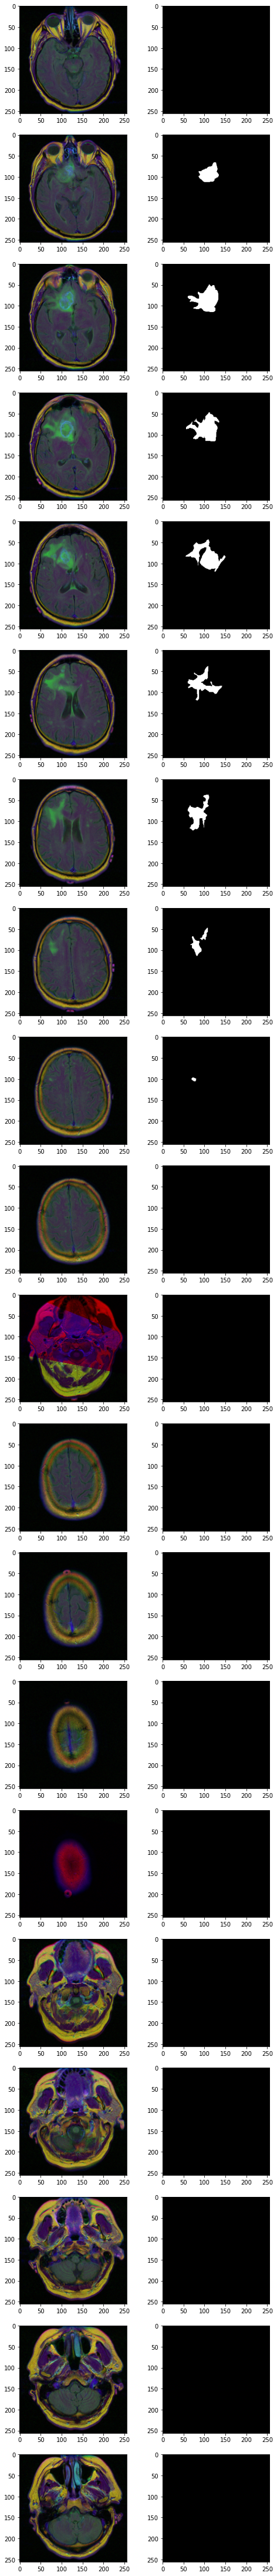

In [ ]:
rows = 20
fig,ax = plt.subplots(rows,2,figsize=(8,80))
for i in range(rows):
    read1 = plt.imread(training_files[i])
    read2 = plt.imread(mask_files[i])
#print(np.max(read2))
    ax[i,0].imshow(read1)
    ax[i,1].imshow(read2,cmap='gray')
plt.show()

In [ ]:
def is_mask(path):
    mask = plt.imread(path)
    if np.max(mask) != 0.0:
        return 1
    else:
        return 0

In [ ]:
df = pd.DataFrame({'training_files':training_files,'mask_files':mask_files})
df['mask'] = df['mask_files'].apply(lambda x: is_mask(x))

In [ ]:
df['mask_files']

0       /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...
1       /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...
2       /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...
3       /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...
4       /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...
                              ...                        
3924    /content/kaggle_3m/TCGA_HT_A61B_19991127/TCGA_...
3925    /content/kaggle_3m/TCGA_HT_A61B_19991127/TCGA_...
3926    /content/kaggle_3m/TCGA_HT_A61B_19991127/TCGA_...
3927    /content/kaggle_3m/TCGA_HT_A61B_19991127/TCGA_...
3928    /content/kaggle_3m/TCGA_HT_A61B_19991127/TCGA_...
Name: mask_files, Length: 3929, dtype: object

In [ ]:
df.head()

training_files  \
0  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...   
1  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...   
2  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...   
3  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...   
4  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...   

                                          mask_files  mask  
0  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...     0  
1  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...     1  
2  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...     1  
3  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...     1  
4  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...     1

In [ ]:
df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

In [ ]:
data = df[df['mask']==1]

In [ ]:
data = data.drop(['mask'],axis=1)

In [ ]:
data.head()

training_files  \
1  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...   
2  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...   
3  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...   
4  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...   
5  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...   

                                          mask_files  
1  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...  
2  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...  
3  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...  
4  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...  
5  /content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_...

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


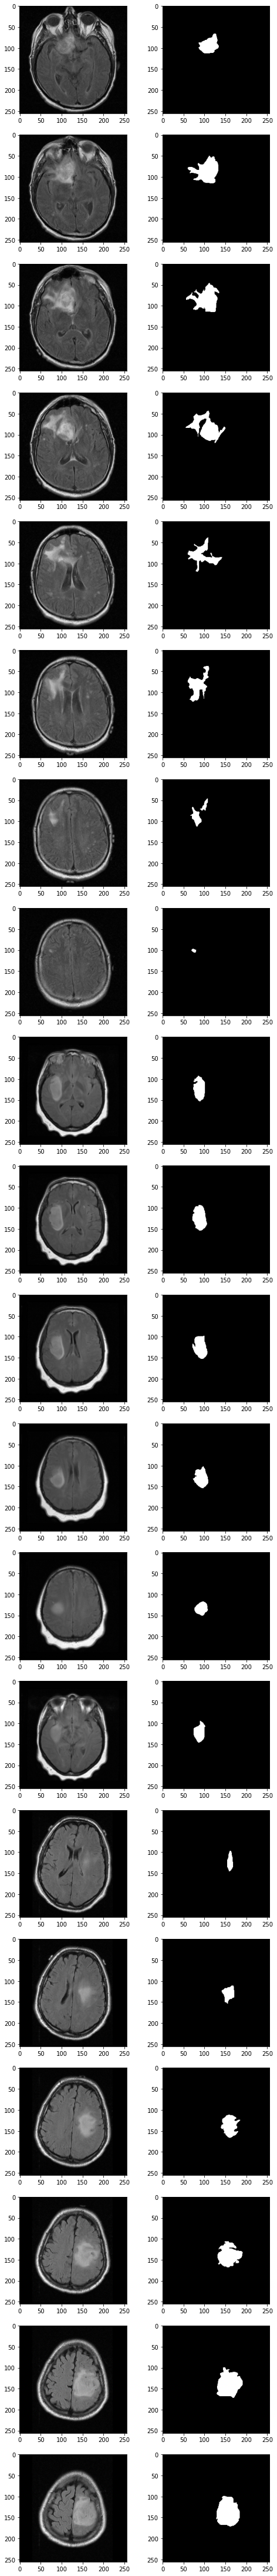

In [ ]:
rows = 20
fig,ax = plt.subplots(rows,2,figsize=(8,80))
for i in range(rows):
    read1 = plt.imread(data['training_files'].iloc[i])
    read2 = plt.imread(data['mask_files'].iloc[i])
    im1 = sk.color.rgb2gray(read1)
    print(im1.shape)
    ax[i,0].imshow(im1,cmap='gray')
    ax[i,1].imshow(read2,cmap='gray')
plt.show()

In [ ]:
!pip install imio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=9a47de2333d6a9daa29cb1e5a5229c7c333b732a86870418da4632cc95fa054b
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [ ]:
#Dermining Preprocesseing Steps
from imio import load, save

In [ ]:
dir = '/content/new_data'
mask_out_path = '/content/new_data/mask'
input_out_path = '/content/new_data/input'
os.mkdir(dir)
os.mkdir(mask_out_path)
os.mkdir(input_out_path)

In [ ]:
training_files[0],data['training_files'].iloc[0]

('/content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10.tif',
 '/content/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif')

In [ ]:
for path in data['training_files']:
    img = plt.imread(path)#load.load_any(path)
    img = sk.color.rgb2gray(img)
    #print(img.shape)
    name = os.path.basename(os.path.normpath(path))
    name = os.path.splitext(name)[0]
    save.to_nii(img, "{}/{}.nii.gz".format(input_out_path,name))

In [ ]:
for path in data['mask_files']:
    img = plt.imread(path)
    img = sk.color.rgb2gray(img)
    name = os.path.basename(os.path.normpath(path))
    name = os.path.splitext(name)[0]
    save.to_nii(img, "{}/{}.nii.gz".format(mask_out_path,name))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
filenames = []
img = sorted(glob('/content/new_data/input/*'))
mask = sorted(glob('/content/new_data/mask/*'))
print('len : ',len(img),len(mask))
for i in range(len(img)):
    filenames.append({'img':img[i],'mask':mask[i]})

len :  1373 1373


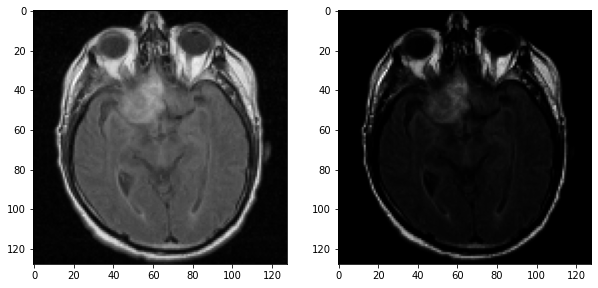

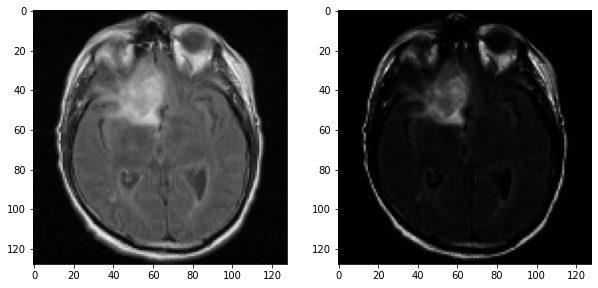

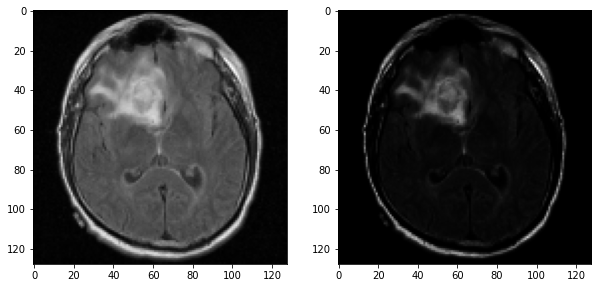

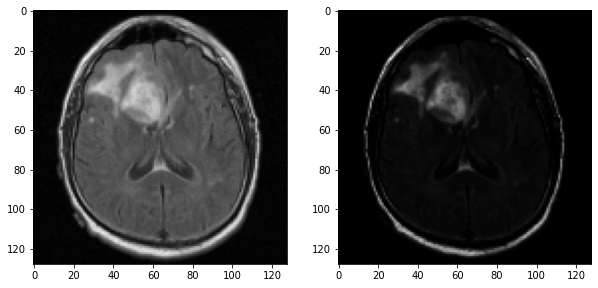

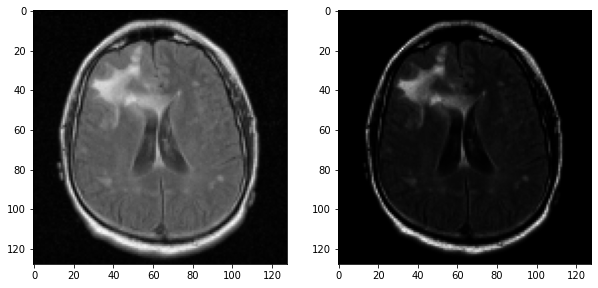

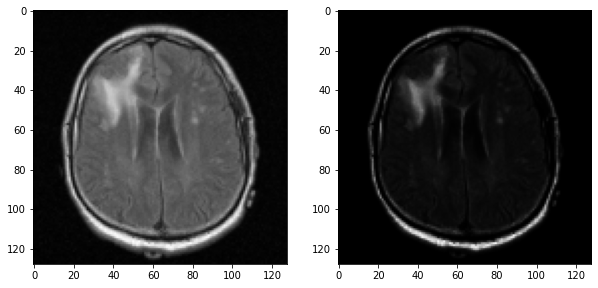

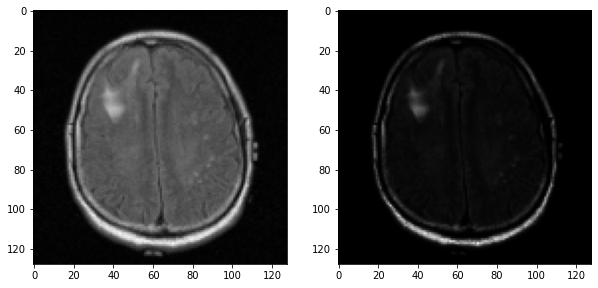

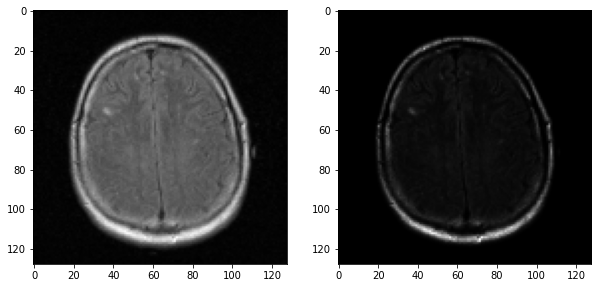

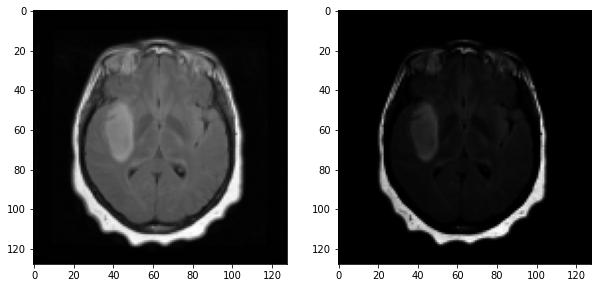

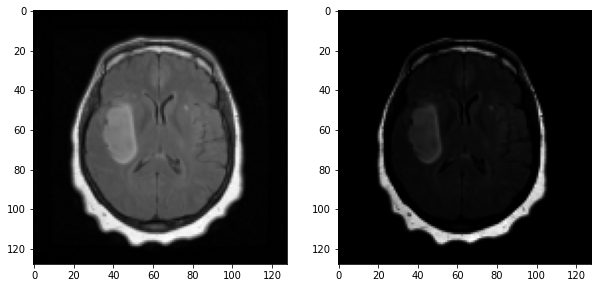

In [ ]:
#Scalling the intensities
from monai.transforms.intensity.dictionary import AdjustContrastd
for i in range(0,10):
  li = LoadImaged(keys=['img','mask'])
  li_img = li(filenames[i])
  li_img['img'].shape
  add = AddChanneld(keys=['img','mask'])
  add_img = add(li_img)
  res = Resized(spatial_size  = (128,128),keys=['img'])
  res_img = res(add_img)
  res_img['img'].shape
  si = AdjustContrastd(keys=["img"],gamma=3)
  si_img = si(res_img)
  #print('>> ',np.max(si_img['img']))
  fig,ax = plt.subplots(1,2,figsize=(10,5))
  ax[0].imshow(res_img['img'][0,:,:],cmap='gray')
  ax[1].imshow(si_img['img'][0,:,:],cmap='gray')
  #np.max(si_img['img']),np.max(si_img['mask']),si_img['img'].shape

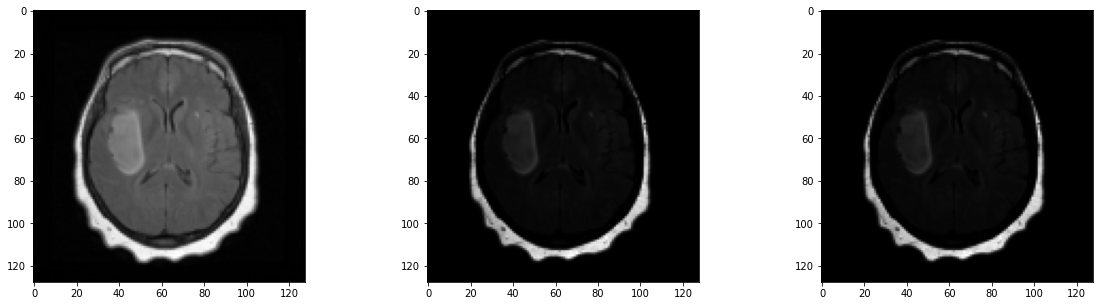

In [ ]:
norm = NormalizeIntensityd(keys=['img','mask'],divisor=255.0,subtrahend=0)
norm_img = norm(si_img)
fig,ax = plt.subplots(1,3,figsize=(20,5))
ax[0].imshow(res_img['img'][0,:,:],cmap='gray')
ax[1].imshow(si_img['img'][0,:,:],cmap='gray')
ax[2].imshow(norm_img['img'][0,:,:],cmap='gray')

In [ ]:
np.max(norm_img['img']),np.max(norm_img['mask'])

(0.0030941146, 1.0)

In [ ]:
org_img = Compose([
    LoadImaged(keys=['img','mask']),
    AddChanneld(keys=['img','mask']),
    Resized(spatial_size  = (128,128),keys=['img','mask']),
    #Resized(spatial_size  = (128,128),keys=['mask']),
    AdjustContrastd(keys="img",gamma=2),
    # RandRotated(keys=['key','mask'],range_x=[0.4,0.4],prob=0.1),
    # RandAxisFlipd(keys=['key','mask'],prob=0.1),
    # RandFlipd(keys=['key','mask'],prob=0.1),
    NormalizeIntensityd(keys=['img','mask'],divisor=255.0,subtrahend=0),
    ToTensor(),
])
preprocess = Compose([
    LoadImaged(keys=['img','mask']),
    AddChanneld(keys=['img','mask']),
    # RandRotated(keys=['key','mask'],range_x=[0.4,0.4],prob=0.1,),
    # RandAxisFlipd(keys=['key','mask'],prob=0.1,),
    # RandFlipd(keys=['key','mask'],prob=0.1,),
    Resized(spatial_size  = (128,128),keys=['img','mask']),
    #Resized(spatial_size  = (128,128),keys=['mask']),
    
    
    AdjustContrastd(keys="img",gamma=2),
    NormalizeIntensityd(keys=['img','mask'],divisor=255.0,subtrahend=0),
    ToTensor(),
])

In [ ]:
train_data = Dataset(data = filenames,transform = preprocess)

In [ ]:
from torch.utils.data import random_split
val = int((len(train_data)/100)*30) # 20%
org = len(train_data)-val
print(val,org)
train_ds,val_ds = random_split(train_data,[org,val])

411 962


In [ ]:
train_loder = DataLoader(train_ds,batch_size = 1)
val_loder = DataLoader(val_ds,batch_size = 1)

In [ ]:
train_patient = first(train_loder)
val_patient = first(val_loder)

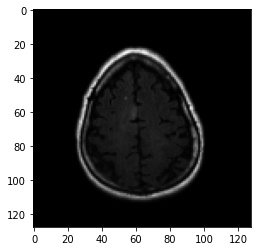

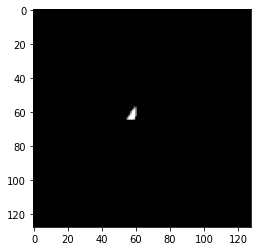

In [ ]:
train_patient['img'].shape
plt.imshow(train_patient['img'][0,0,:,:],cmap='gray')
plt.show()
plt.imshow(train_patient['mask'][0,0,:,:],cmap='gray')

0.001997621 (1, 1, 128, 128) (1, 1, 128, 128)
0.001997621 (1, 1, 128, 128) (1, 1, 128, 128)
0.0022783692 (1, 1, 128, 128) (1, 1, 128, 128)
0.0027434335 (1, 1, 128, 128) (1, 1, 128, 128)
0.0027149443 (1, 1, 128, 128) (1, 1, 128, 128)


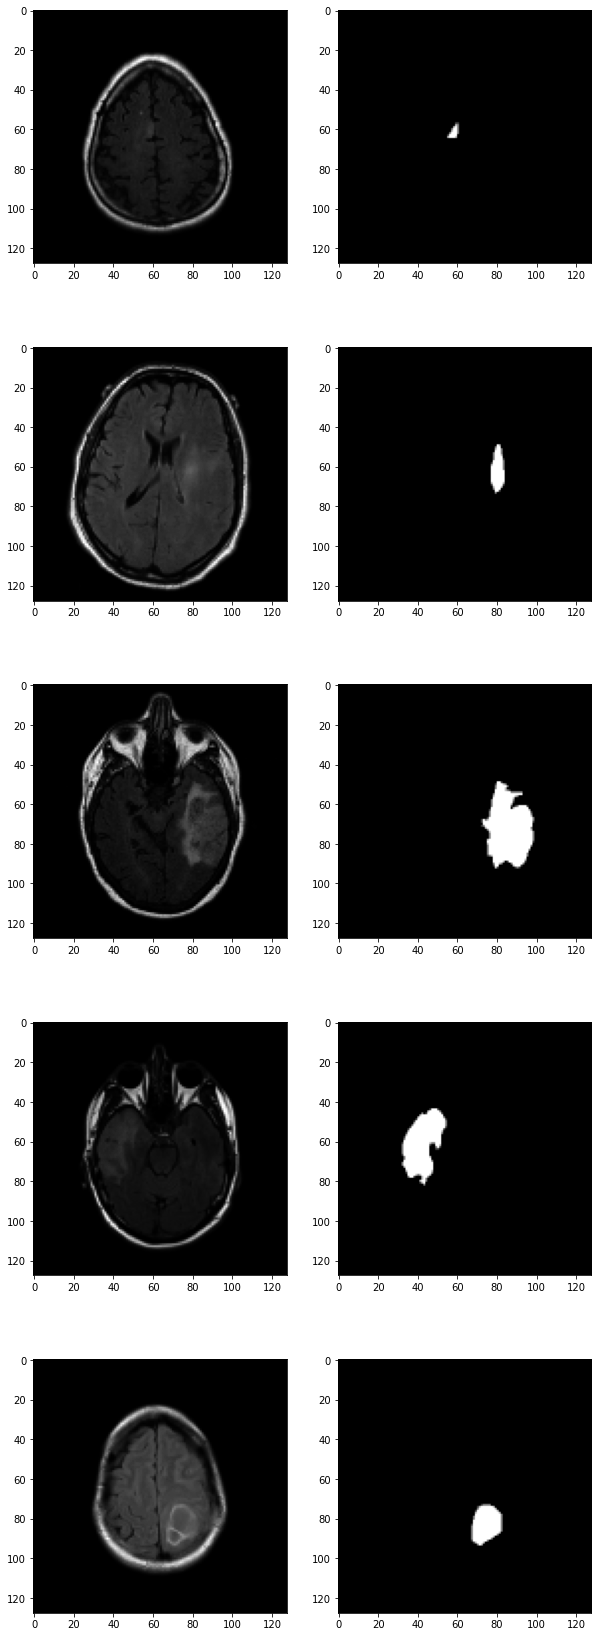

In [ ]:
r = 5
fig,ax = plt.subplots(r,2,figsize=(10,30))
rr = 0
for batc in train_loder:
  print(np.max(train_patient['img'][0,0,:,:].numpy()),train_patient['img'].numpy().shape,train_patient['mask'].numpy().shape)
  train_patient = batc
  ax[rr][0].imshow(train_patient['img'][0,0,:,:],cmap='gray')
  ax[rr][1].imshow(train_patient['mask'][0,0,:,:],cmap='gray')

  if rr >=4:
    break
  rr+=1

In [ ]:
import torch, torchvision 
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
device='cuda'
torch.cuda.empty_cache()

In [ ]:
model = monai.networks.nets.UNet(
        spatial_dims=2,
        in_channels=1,
        out_channels=1,
        channels=(16, 32, 64,128,256,512),
        dropout=0.3,
        strides=(2, 2, 2, 2,2),
        num_res_units=3,
    
    ).to(device)
loss_function = monai.losses.DiceLoss(sigmoid=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-3)

In [ ]:
epoch_loss_values = []
val_loss_values = []

In [ ]:
num_epochs = 10
from tqdm import tqdm

In [ ]:
for epoch in (range(num_epochs)):
        print("-" * num_epochs)
        print(f"epoch {epoch + 1}/{num_epochs}")
        model.train()
        epoch_loss = 0
        avg_val_loss = 0
        step = 0
        print('traning')
        for batch_data in tqdm(train_loder):
            step += 1
            inputs, labels = torch.reshape(batch_data['img'],(1,1,128,128)).to(device), batch_data['mask'].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            epoch_len = len(train_ds) // train_loder.batch_size
        epoch_loss /= step
        epoch_loss_values.append(epoch_loss)
        
        
        ii = 0
        
        for batch in tqdm(val_loder):#val_patient
            ii+=1
            inputs, labels = torch.reshape(batch['img'],(1,1,128,128)).to(device), batch['mask'].to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            avg_val_loss+=loss.item()
        avg_val_loss = avg_val_loss/ii
        val_loss_values.append(avg_val_loss)
       
        
        print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f} validation_loss: {avg_val_loss:.4f}")

----------
epoch 1/10
traning


100%|██████████| 411/411 [00:07<00:00, 54.08it/s]


epoch 1 average loss: 0.7977 validation_loss: 0.6827
----------
epoch 2/10
traning


100%|██████████| 411/411 [00:07<00:00, 58.37it/s]


epoch 2 average loss: 0.5614 validation_loss: 0.5667
----------
epoch 3/10
traning


100%|██████████| 411/411 [00:07<00:00, 56.59it/s]


epoch 3 average loss: 0.4849 validation_loss: 0.4946
----------
epoch 4/10
traning


100%|██████████| 411/411 [00:07<00:00, 57.82it/s]


epoch 4 average loss: 0.4415 validation_loss: 0.4478
----------
epoch 5/10
traning


100%|██████████| 411/411 [00:07<00:00, 57.41it/s]


epoch 5 average loss: 0.4218 validation_loss: 0.4239
----------
epoch 6/10
traning


100%|██████████| 411/411 [00:07<00:00, 57.97it/s]


epoch 6 average loss: 0.4060 validation_loss: 0.4253
----------
epoch 7/10
traning


100%|██████████| 411/411 [00:07<00:00, 57.76it/s]


epoch 7 average loss: 0.3921 validation_loss: 0.4410
----------
epoch 8/10
traning


100%|██████████| 411/411 [00:07<00:00, 53.61it/s]


epoch 8 average loss: 0.3828 validation_loss: 0.4026
----------
epoch 9/10
traning


100%|██████████| 411/411 [00:07<00:00, 57.40it/s]


epoch 9 average loss: 0.3739 validation_loss: 0.3859
----------
epoch 10/10
traning


100%|██████████| 411/411 [00:07<00:00, 56.96it/s]

epoch 10 average loss: 0.3656 validation_loss: 0.3876


In [ ]:
torch.save(model,'model_gray_3')

In [ ]:
!zip '/content/mod3.zip' "/content/model_gray_3" 

  adding: content/model_gray_3 (deflated 8%)


<class 'list'> <class 'float'> 10


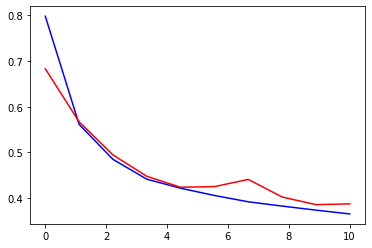

In [ ]:
print(type(val_loss_values),type(val_loss_values[0]),len(val_loss_values))
#val_loss_values = [e.detach().numpy() for e in val_loss_values]
plt.plot(np.linspace(0,len(epoch_loss_values),len(epoch_loss_values)),epoch_loss_values,color='blue')
plt.plot(np.linspace(0,len(val_loss_values),len(val_loss_values)),val_loss_values,color='red')

<class 'list'> <class 'float'> 10


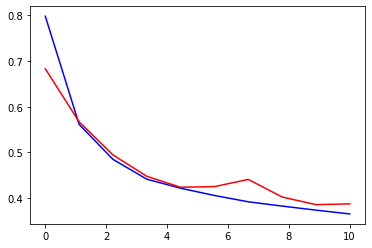

In [ ]:
print(type(val_loss_values),type(val_loss_values[0]),len(val_loss_values))
#val_loss_values = [e.detach().numpy() for e in val_loss_values]
plt.plot(np.linspace(0,len(epoch_loss_values),len(epoch_loss_values)),epoch_loss_values,color='blue')
plt.plot(np.linspace(0,len(val_loss_values),len(val_loss_values)),val_loss_values,color='red')

torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32
torch.Size([1, 1, 128, 128]) float32


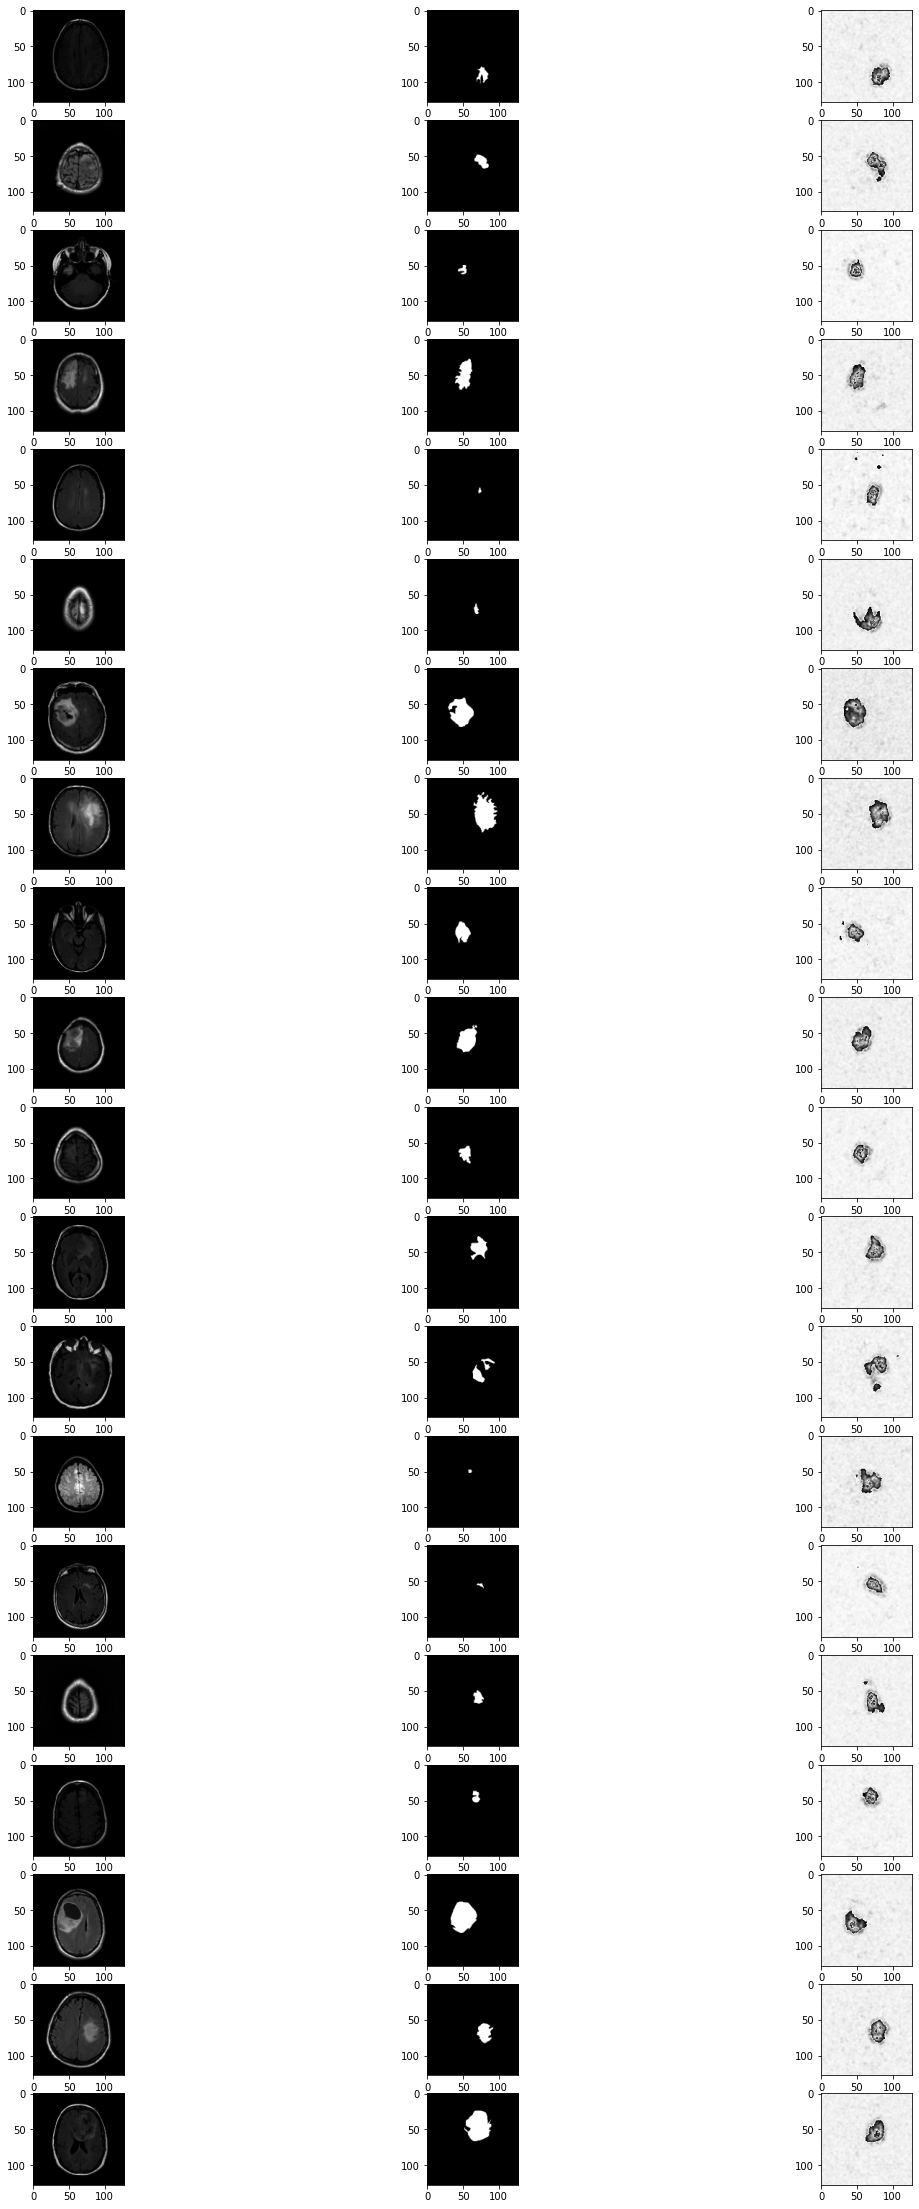

In [ ]:
r = 20
i=0
fig,ax = plt.subplots(r,3,figsize=(20,40))
for batch in val_loder:
  inp = torch.reshape(batch['img'],(1,1,128,128)).to(device)
  out = model(inp).to('cpu')
  print(out.shape,(out[0,0,:,:].detach().numpy().dtype))
  ax[i,0].imshow(batch['img'][0,0,:,:],cmap='gray')
  ax[i,1].imshow(batch['mask'][0,0,:,:],cmap='gray')
  ax[i,2].imshow(out[0,0,:,:].detach().numpy().astype('uint8'),cmap='gray')
  
  if i>=r-1:
    break
  i=i+1

In [ ]:
out2 = out.to('cpu')

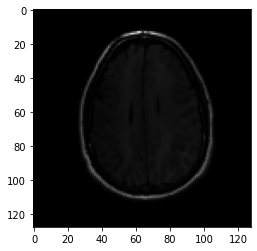

In [ ]:
plt.imshow(val_patient['img'][0,0,:,:],cmap='gray')

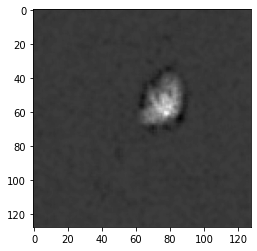

In [ ]:
plt.imshow(out2[0,0,:,:].detach().numpy(),cmap='gray')

In [ ]:
np.max(val_patient['mask'][0,0,:,:].numpy()),np.max(out2[0,0,:,:].detach().numpy())

(1.0, 427.95642)

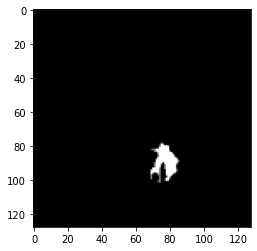

In [ ]:
plt.imshow(val_patient['mask'][0,0,:,:],cmap='gray')

In [ ]:
learning_rate = 0.001
num_epochs = 1
from monai.losses.dice import DiceLoss
dl = DiceLoss(sigmoid=True)
from tqdm import tqdm

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
ii = 0
losss = []
iter1 = []
val_loss = []
#dl = DiceLoss()
for epoch in range(num_epochs):
    
    
    for batch in (train_loder):
        #print("###################################\n")
        img = torch.reshape(batch['img'],(1,3,256,256)).to(device)
        mask = batch['mask'].to(device)
        
        #print('shap : ',torch.max(output),torch.max(mask),'Output\n ',output,'Mask\n',mask)
        
        optimizer.zero_grad()
        output = net(img)
        loss = dl(output,mask)
        loss.backward()
        losss.append(loss.cpu())
        optimizer.step()
        #print('Output is : ',loss)
        
        iter1.append(ii)
        
        if ii>=300:
            print('Output is : ',loss)
        ii = ii+1
        #break
    print('Output is : ',loss)
    #break

NameError: ignored